#### Import external packages

In [1]:
import numpy as np
from numpy.linalg import inv, norm
from matplotlib import pyplot as plt
np.set_printoptions(precision=6)
%matplotlib inline

#### Import twin modules & NMG lattice parameters, irratinal elements

In [2]:
## twin modules
from nmgtwinning import *

## Irrational elements NC twins
q = (2*am*bm*np.cos(gamma) - np.sqrt(am**4 + bm**4 + 2*am**2 * bm**2 * np.cos(2*gamma)))/(am**2 - bm**2)
r = (2*am*bm*np.cos(gamma) + np.sqrt(am**4 + bm**4 + 2*am**2 * bm**2 * np.cos(2*gamma)))/(am**2 - bm**2)

#### Transformation Matrix

$\mathbf{V}_1 \leftrightarrow \mathbf{R}$

In [3]:
# U₁ lattice vectors in reference frame
ar = [am,0,0]
br = [bm*np.cos(gamma),bm*np.sin(gamma),0]
cr = [0,0,cm]

## ᵣPᵤ₁
rPu1 = np.column_stack((ar,br,cr)) / ao
del ar,br,cr

print('ᵣPᵤ₁ =')
print(rPu1)

ᵣPᵤ₁ =
[[ 1.024005 -0.006582  0.      ]
 [ 0.        1.019183  0.      ]
 [ 0.        0.        0.957476]]


#### Orientation Relationship

##### $\mathbf{V}_1 \to \mathbf{V}_2$

In [4]:
## s₁₂
twophi = angleTBpair(rPu1,[1,1,0],[-1,1,0])
s12 = 2/np.tan(twophi) #s = 2 cot2φ
del twophi
print ('s₁₂ = %5.6f' % s12)
print()

## C₁₂
C12 = rotationmatrix([1,1,0],np.pi) ## 2-fold about [1,1,0]
print('C₁₂ =')
print(C12)
print()

## L₁₂
L12 = OR_RefFrame([1,1,0],[-1,1,0],s12,rPu1,C12)
print('L₁₂ =')
print(L12)
print()

s₁₂ = 0.009399

C₁₂ =
[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0. -1.]]

L₁₂ =
[[-0.011127  0.999938  0.      ]
 [ 0.999938  0.011127  0.      ]
 [ 0.        0.       -1.      ]]



##### Verify OR

Is it the same as 2-fold rotation about the $(110)_m$ plane normal?

In [5]:
print('Verify...')
print()
print('L =')
print(rotationmatrix([1,1,0] @ inv(rPu1), np.pi))
print()

Verify...

L =
[[-0.011127  0.999938  0.      ]
 [ 0.999938  0.011127  0.      ]
 [ 0.        0.       -1.      ]]



##### $\mathbf{V}_2 \to \mathbf{V}_3$

In [6]:
## s₂₃
twophi = angleTBpair(rPu1,[1,q,0],[-1,-r,0])
s23 = 2/np.tan(twophi) #s = 2 cot2φ
print('s₂₃ = %5.6f' % s23)
print()
del twophi

## C₂₃
C23 = rotationmatrix([0,0,1],-np.pi/2) ## 4⁻-fold about [0,0,1]
print('C₂₃ =')
print(C23)
print()


## L₂₃
L23 = OR_RefFrame([1,r,0],[-r,1,0],s23,rPu1,C23)
print('L₂₃ =')
print(L23)
print()

print('θ = cos⁻¹(%4.4f) = %4.2f°' % (L23[0,0],np.degrees(np.arccos(L23[0,0]))))
print('θ = sin⁻¹(%4.4f) = %4.2f°' % (L23[1,0],np.degrees(np.arcsin(L23[1,0]))))
print()
print('Verify rotation matrix...')
print(rotationmatrix([0,0,-1],np.arccos(L23[0,0])))
print('90.46° clockwise rotation')

s₂₃ = 0.015974

C₂₃ =
[[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]

L₂₃ =
[[-0.007987  0.999968  0.      ]
 [-0.999968 -0.007987  0.      ]
 [ 0.        0.        1.      ]]

θ = cos⁻¹(-0.0080) = 90.46°
θ = sin⁻¹(-1.0000) = -89.54°

Verify rotation matrix...
[[-0.007987  0.999968  0.      ]
 [-0.999968 -0.007987  0.      ]
 [ 0.        0.        1.      ]]
90.46° clockwise rotation


##### $\mathbf{V}_3 \to \mathbf{V}_4$

In [7]:
## s₃₄
twophi = angleTBpair(rPu1,[1,1,0],[-1,1,0])
s34 = 2/np.tan(twophi) # s = 2 cot2φ
print('s₃₄ = %5.6f' % s34)
print()
del twophi

## C₃₄
C34 = rotationmatrix([-1,1,0],np.pi) ## 2-fold about [-1,1,0]
print('C₃₄ =')
print(C34)
print()


## L₃₄
L34 = OR_RefFrame([-1,-1,0],[1,-1,0],s34,rPu1,C34)
print('L₃₄ =')
print(L34)
print()

s₃₄ = 0.009399

C₃₄ =
[[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0. -1.]]

L₃₄ =
[[ 0.011127 -0.999938  0.      ]
 [-0.999938 -0.011127  0.      ]
 [ 0.        0.       -1.      ]]



##### Verify OR

Is it the same as 2-fold rotation about the $(110)_m$ plane normal?

In [8]:
print('Verify...')
print()
print('L =')
print([[-1,0,0],[0,-1,0],[0,0,1]] @ rotationmatrix([1,1,0] @ inv(rPu1), np.pi))
print()

Verify...

L =
[[ 0.011127 -0.999938  0.      ]
 [-0.999938 -0.011127  0.      ]
 [ 0.        0.       -1.      ]]



##### $\mathbf{V}_4 \to \mathbf{V}_1$

In [9]:
## s₄₁
twophi = angleTBpair(rPu1,[1,q,0],[-1,-r,0])
s41 = 2/np.tan(twophi) # s = 2 cot2φ
print('s₄₁ = %5.6f' % s41)
print()
del twophi

## C₄₁
C41 = rotationmatrix([0,0,1],np.pi/2) ## 4⁺-fold about [0,0,1]
print('C₄₁ =')
print(C41)
print()


## L₄₁
L41 = OR_RefFrame([-1,-r,0],[r,-1,0],s41,rPu1,C41)
print('L₄₁ =')
print(L41)
print()

print('θ = cos⁻¹(%4.4f) = %4.2f°' % (L41[0,0],np.degrees(np.arccos(L41[0,0]))))
print('θ = sin⁻¹(%4.4f) = %4.2f°' % (L41[1,0],np.degrees(np.arcsin(L41[1,0]))))
print()
print('Verify rotation matrix...')
print(rotationmatrix([0,0,1],np.arccos(L41[0,0])))
print('89.54° counterclockwise rotation')

s₄₁ = 0.015974

C₄₁ =
[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]

L₄₁ =
[[ 0.007987 -0.999968  0.      ]
 [ 0.999968  0.007987  0.      ]
 [ 0.        0.        1.      ]]

θ = cos⁻¹(0.0080) = 89.54°
θ = sin⁻¹(1.0000) = 89.54°

Verify rotation matrix...
[[ 0.007987 -0.999968  0.      ]
 [ 0.999968  0.007987  0.      ]
 [ 0.        0.        1.      ]]
89.54° counterclockwise rotation


#### Product of Misorientation

$\mathbf{M}_{QJL} = \mathbf{L}_{41}\ \ \mathbf{L}_{24}\ \ \mathbf{L}_{32}\ \ \mathbf{L}_{13}$

In [10]:
MQJL = L41 @ L34 @ L23 @ L12
print('M_QJL =')
print(MQJL)
print()
print('θ = sin⁻¹(%5.6f) = %5.6f°' % (MQJL[1,0],np.degrees(np.arcsin(MQJL[1,0]))))
print('θ = cos⁻¹(%5.6f) = %5.6f°' % (MQJL[1,1],np.degrees(np.arccos(MQJL[1,1]))))

M_QJL =
[[1.00000e+00 4.54671e-15 0.00000e+00]
 [4.54671e-15 1.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 1.00000e+00]]

θ = sin⁻¹(0.000000) = 0.000000°
θ = cos⁻¹(1.000000) = 0.000097°


#### Disposition of Variants

##### $\mathbf{V}_1$

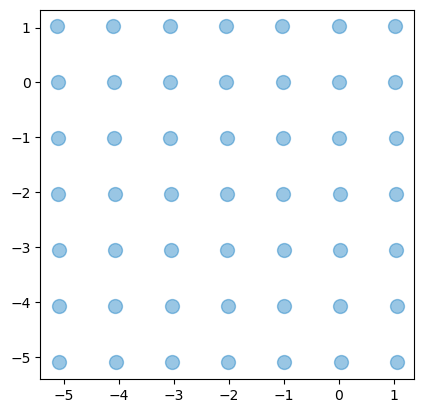

In [11]:
## create lattice points range
x = np.arange(-5,2)
y = np.arange(-5,2)
rm = latticepoints(x,y)
del x,y

## lattice vectors of variant V1 in 3-space
r1 = rPu1 @ rm
del rm

## plot variant V1
fig, ax = plt.subplots() #define figure and axes
plotlattice(r1,ax,lat_col[0])
plt.show()

##### $\mathbf{V}_2$

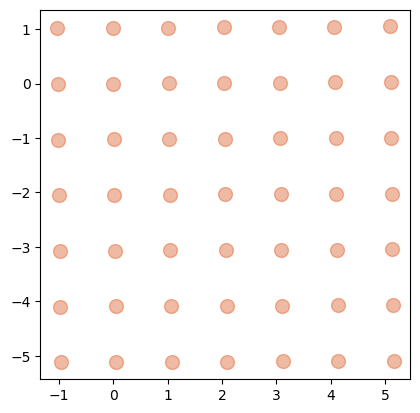

In [12]:
## create lattice points range
x = np.arange(-5,2)
y = np.arange(-1,6)
rm = latticepoints(x,y)
del x,y

## lattice vectors of variant V1 in 3-space
vector = rPu1 @ rm
del rm


r2 = L12 @ vector
del vector

## plot variant V3
fig, ax = plt.subplots() #define figure and axes
plotlattice(r2,ax,lat_col[1])
plt.show()

##### $\mathbf{V}_3$

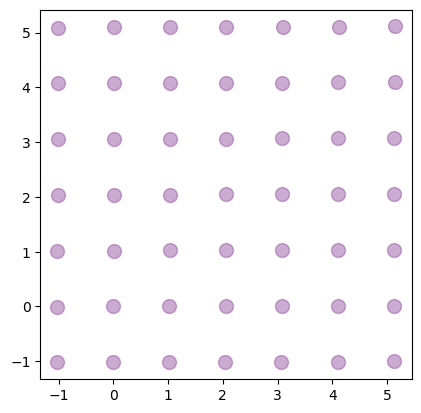

In [13]:
## create lattice points range
x = np.arange(-1,6)
y = np.arange(-5,2)
rm = latticepoints(x,y)
del x,y

## lattice vectors of variant V1 in 3-space
vector = rPu1 @ rm
del rm


r3 = L23 @ L12 @ vector
del vector

## plot variant V3
fig, ax = plt.subplots() #define figure and axes
plotlattice(r3,ax,lat_col[2])
plt.show()

##### $\mathbf{V}_4$

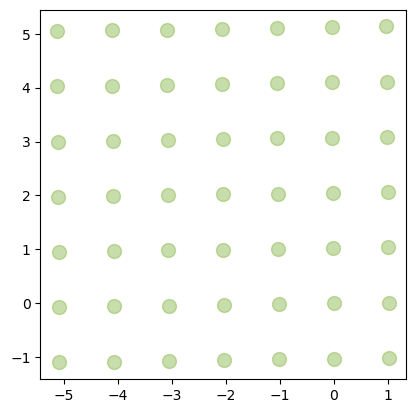

In [14]:
## create lattice points range
x = np.arange(-5,2)
y = np.arange(-5,2)
rm = latticepoints(x,y)
del x,y

## lattice vectors of variant V1 in 3-space
vector = rPu1 @ rm
del rm


r4 = L34 @ L23 @ L12 @ vector
del vector

## plot variant V3
fig, ax = plt.subplots() #define figure and axes
plotlattice(r4,ax,lat_col[3])
plt.show()

##### $\mathbf{V}_1^*$

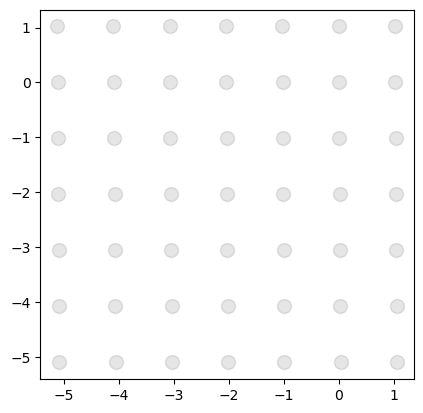

In [15]:
## create lattice points range
x = np.arange(-5,2)
y = np.arange(-5,2)
rm = latticepoints(x,y)
del x,y

## lattice vectors of variant V1 in 3-space
vector = rPu1 @ rm
del rm


r1s = L41 @ L34 @ L23 @ L12 @ vector
del vector

## plot variant V1
fig, ax = plt.subplots() #define figure and axes
plotlattice(r1s,ax,lat_col[4])
plt.show()

##### Orientation of TB

In [16]:
## xrange
x1 = np.arange(-6,2)
x2 = np.arange(-1,7)

## 1st twin boundary (1 1 0)
vec = np.array([1,1,0]) @ inv(rPu1) # normal to (1 1 0) plane of V1 in R-frame
print(vec)
m = -vec[0]/vec[1] # slope of TB in reference frame
y12 = m*x2
del vec,m

## 2nd twin boundary (1 r 0)
vec = np.array([1,r,0]) @ inv(L12 @ rPu1) # normal to (1 r 0) plane of V3 in R-frame
print(vec)
m = -vec[0]/vec[1] # slope of TB in reference frame
y23 = m*x2
del vec,m

## 3rd twin boundary (-1 -1 0)
vec = np.array([-1,-1,0]) @ inv(L23 @ L12 @ rPu1) # normal to (-1 -1 0) plane of V2 in R-frame
print(vec)
m = -vec[0]/vec[1] # slope of TB in reference frame
y34 = m*x2
del vec,m

## 4th twin boundary (-1 -r 0)
vec = np.array([1,r,0]) @ inv(L34 @ L23 @ L12 @ rPu1) # normal to (-1 -r 0) plane of V4 in R-frame
print(vec)
m = -vec[0]/vec[1] # slope of TB in reference frame
y41 = m*x1
del vec,m

[0.976557 0.987484 0.      ]
[0.314654 0.980119 0.      ]
[-0.979653  0.984413  0.      ]
[ 0.333329 -0.973926  0.      ]


#### QJL Schematics

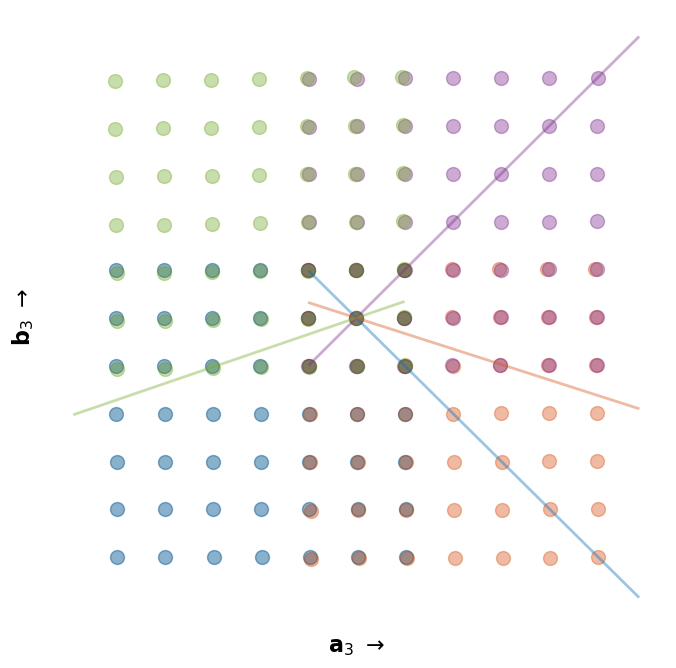

In [17]:
## define figure
fig, ax = plt.subplots() # define figure and axes
fig.set_size_inches([8, 8])

## plot lattice points
plotlattice(r1,ax,lat_col[0]) #Variant V₁
plotlattice(r2,ax,lat_col[1]) #Variant V₂
plotlattice(r3,ax,lat_col[2]) #Variant V₃
plotlattice(r4,ax,lat_col[3]) #Variant V₄
plotlattice(r1s,ax,lat_col[4]) #Variant V₁*

## plot twin boundaries
ax.plot(x2,y12,color=lat_col[0],linewidth=2)
ax.plot(x2,y23,color=lat_col[1],linewidth=2)
ax.plot(x2,y34,color=lat_col[2],linewidth=2)
ax.plot(x1,y41,color=lat_col[3],linewidth=2)

## Axis options
ax.set_aspect('equal') # aspect ratio 1:1

#xlabel and ylabel
ax.set_xlabel(r'$\mathbf{a}_3\ \rightarrow$', fontsize=16),
ax.set_ylabel(r'$\mathbf{b}_3\ \rightarrow$',fontsize=16)

# Eliminate spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# remove ticks
ax.set_xticks([])
ax.set_yticks([])

## show plot
plt.show()

In [18]:
#fig.savefig('QJL-TBOrientation.svg')

#### Lattice Vectors

$V_1$

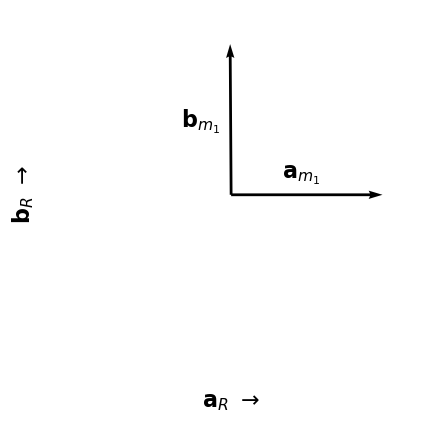

In [19]:
## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPu1)

ax.text(+0.015,+0.005,r'$\mathbf{a}_{m_1}$',fontsize=16) #label vector a
ax.text(-0.015,+0.02,r'$\mathbf{b}_{m_1}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

$V_2$

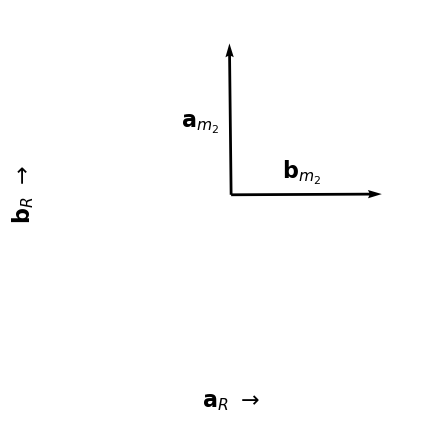

In [20]:
## plot lattice vectors a and b
fig, ax = latticevectors_ab(L12 @ rPu1)

ax.text(-0.015,+0.02,r'$\mathbf{a}_{m_2}$',fontsize=16) #label vector a
ax.text(+0.015,+0.005,r'$\mathbf{b}_{m_2}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

$V_3$

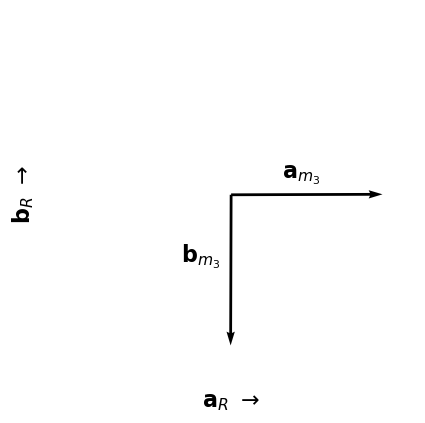

In [21]:
## plot lattice vectors a and b
fig, ax = latticevectors_ab(L23 @ L12 @ rPu1)

ax.text(+0.015,+0.005,r'$\mathbf{a}_{m_3}$',fontsize=16) #label vector a
ax.text(-0.015,-0.02,r'$\mathbf{b}_{m_3}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

$V_4$

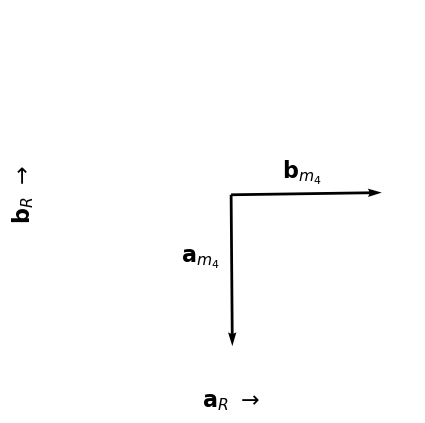

In [22]:
## plot lattice vectors a and b
fig, ax = latticevectors_ab(L34 @ L23 @ L12 @ rPu1)

ax.text(-0.015,-0.02,r'$\mathbf{a}_{m_4}$',fontsize=16) #label vector a
ax.text(+0.015,+0.005,r'$\mathbf{b}_{m_4}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

$V_1^*$

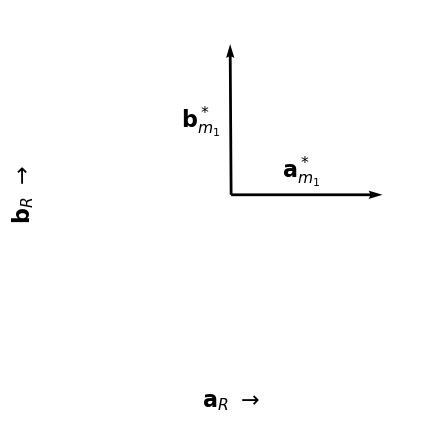

In [23]:
## plot lattice vectors a and b
fig, ax = latticevectors_ab(L41 @ L34 @ L23 @ L12 @ rPu1)

ax.text(+0.015,+0.005,r'$\mathbf{a}_{m_1}^*$',fontsize=16) #label vector a
ax.text(-0.015,+0.02,r'$\mathbf{b}_{m_1}^*$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax